In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def load_data(file_path, grandlabels):
    data = pd.read_csv(file_path, header=None)
    # Assign column names ["sepal length","sepal width","petal length","petal width","family"]
    data.columns = grandlabels
    return data

In [3]:
grandlabels = ["a", "b", "c", "d", "e", "f", "family"]
df = load_data("trainData.txt",grandlabels)
print(df)

             a         b         c         d         e         f  family
0     1.852840 -0.164369  1.098391 -0.930737 -1.019334  1.166963       1
1    -0.215308  1.636660 -0.618311  0.990022  0.386703  1.159263       0
2     0.046535 -1.164873  0.043922 -0.413691 -1.088479 -1.379890       1
3    -0.698468 -0.731388  0.226825  0.148795 -1.444622  1.175739       1
4    -2.134496 -0.946796  0.733126 -3.504333 -1.823387  0.904649       1
...        ...       ...       ...       ...       ...       ...     ...
5995 -2.124310  0.239802 -0.290299 -1.116180 -1.408750  0.500571       1
5996  1.203793 -0.706608  1.388906 -0.507093  1.352956 -1.322261       1
5997 -0.063940 -0.922050  1.654456 -1.527528  1.876096  0.759290       1
5998  1.066654  3.277174 -0.530879  1.423389 -1.113810 -0.150471       0
5999 -0.471865 -0.371190 -1.040412 -0.253746 -0.021201 -1.437623       0

[6000 rows x 7 columns]


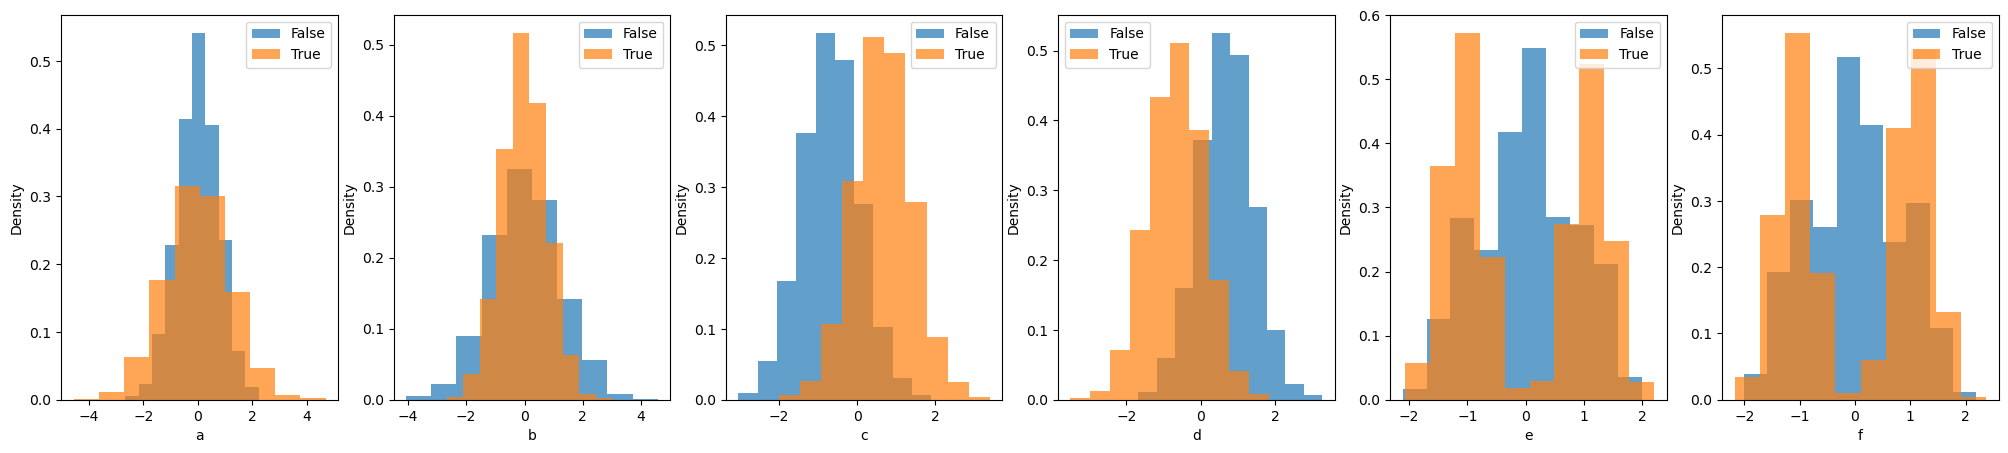

In [4]:
# plot histogram of the sepal length
# change the color of the element depending on the family

columns = len(df.columns)-1


fig, axs = plt.subplots(1, columns, figsize=(25, 5))

for j,grandlabel in enumerate(grandlabels[:-1]):
    axs[j].set_xlabel(grandlabel)
    axs[j].set_ylabel('Density')
    for i in range(2):
        axs[j].hist(df[grandlabel.lower()][df['family'] == i], bins=10, alpha=0.7, density=True,label = str(bool(i)))
    axs[j].legend()
plt.show()

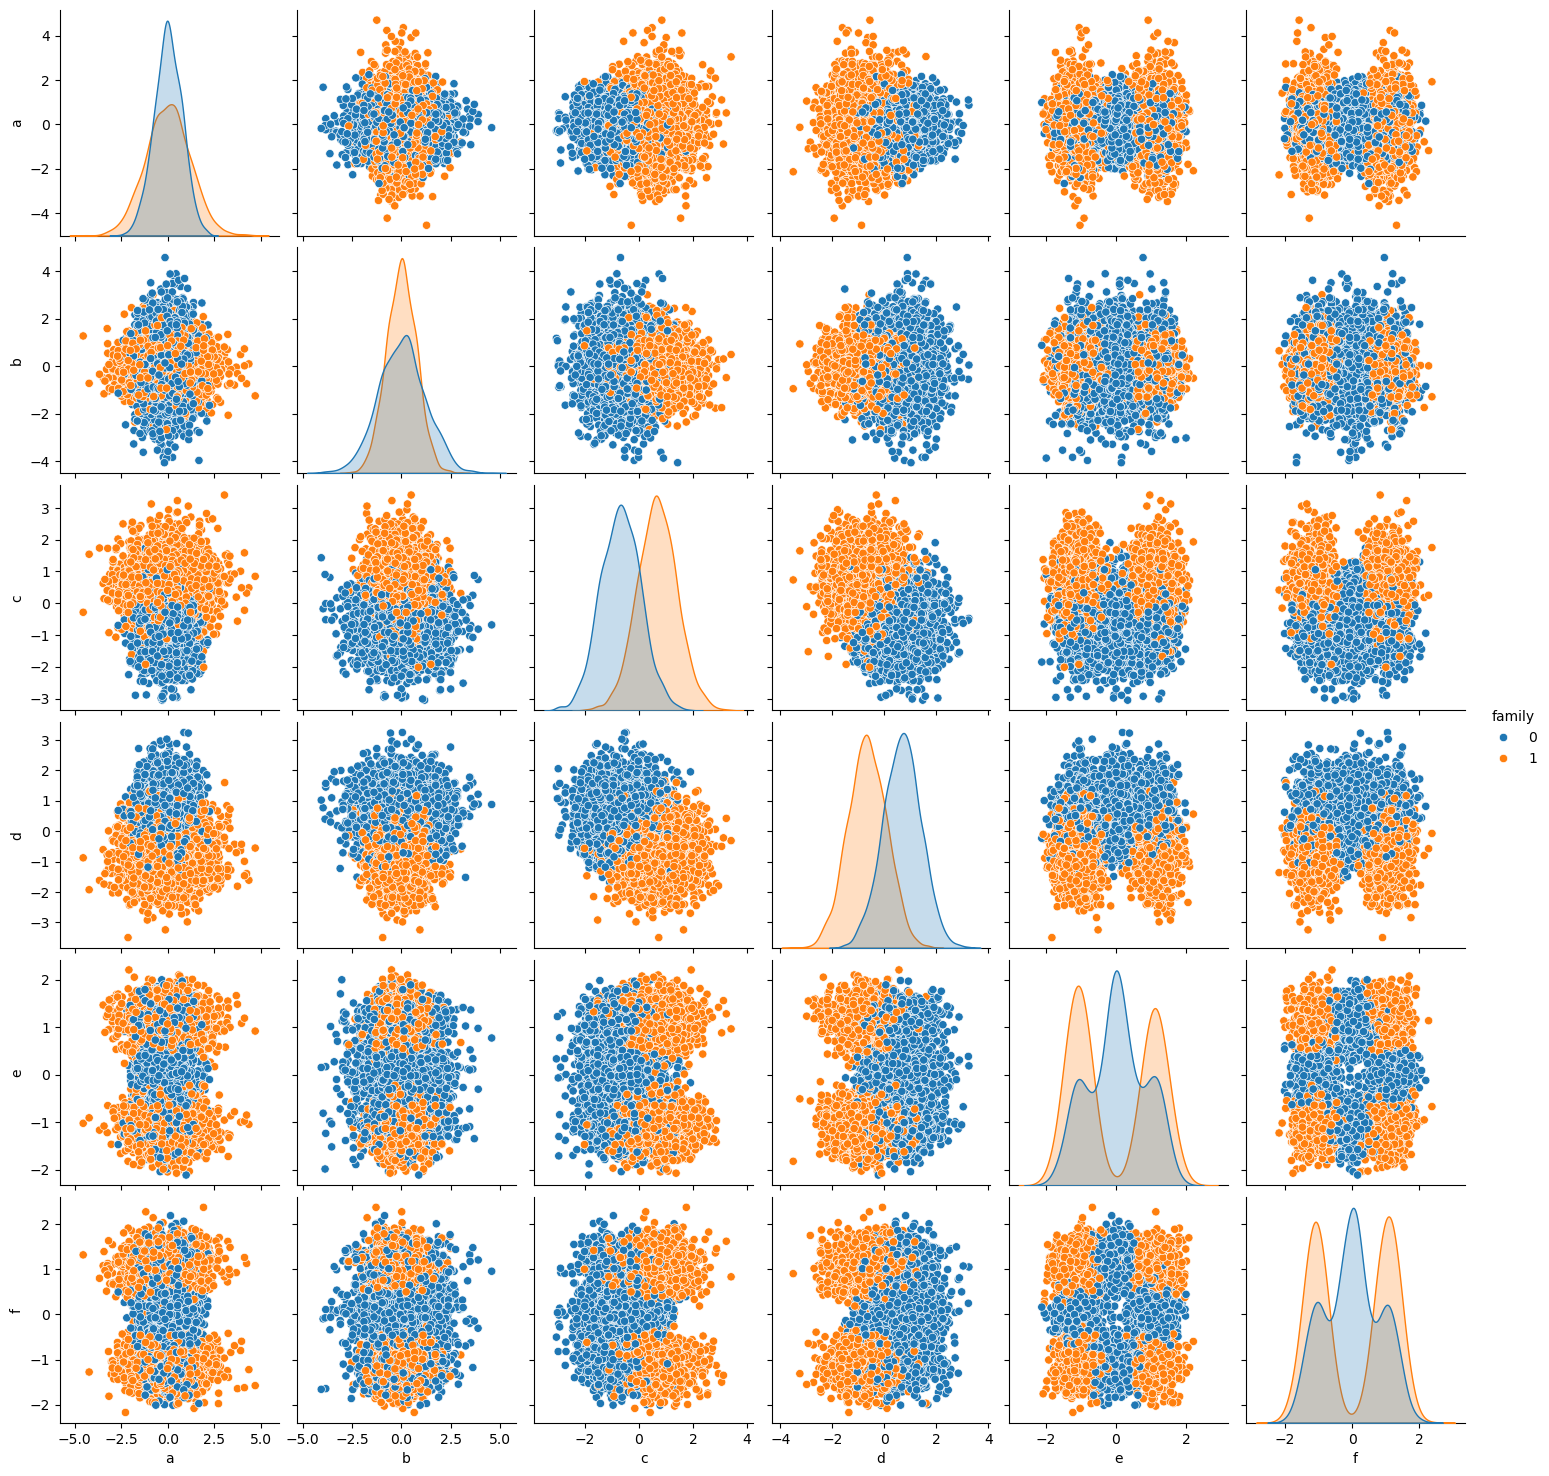

In [5]:
# plots with each combination of the four features
# create a pairplot with the four features and the family as hue, frequency normalized
sns.pairplot(df, hue="family", diag_kind="auto")
plt.show()

In [6]:

print("Means")


localdf = df.loc[:, df.columns != "family"] 
mean = localdf.mean()
print(mean)

#print the data types of the df columns
#print("Data types:")
#print(df.dtypes)

print(mean.index)
df[mean.index] = df[mean.index] - mean

print((localdf.T @ localdf)/len(localdf))
print("")
var = localdf.var()
print("Variance")
print(var)
print()

std = localdf.std()
print("Standard deviation")
print(std)
print("")



Means
a    0.001707
b    0.005039
c   -0.005608
d    0.001095
e   -0.007000
f    0.009105
dtype: float64
Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')
          a         b         c         d         e         f
a  1.001346  0.005176  0.001758  0.014529  0.009995 -0.012944
b  0.005176  0.998378 -0.015864 -0.000435 -0.004048 -0.000772
c  0.001758 -0.015864  1.002513 -0.437067 -0.026821  0.006293
d  0.014529 -0.000435 -0.437067  0.990295  0.025328  0.008279
e  0.009995 -0.004048 -0.026821  0.025328  1.001246  0.000812
f -0.012944 -0.000772  0.006293  0.008279  0.000812  0.997307

Variance
a    1.001510
b    0.998519
c    1.002649
d    0.990459
e    1.001364
f    0.997390
dtype: float64

Standard deviation
a    1.000755
b    0.999259
c    1.001324
d    0.995218
e    1.000682
f    0.998694
dtype: float64



In [7]:
# pandas dataframe minus corresponding mean of each column

print("Dataframe minus mean")
print(df)
print("")


Dataframe minus mean
             a         b         c         d         e         f  family
0     1.851133 -0.169408  1.103998 -0.931832 -1.012334  1.157858       1
1    -0.217015  1.631621 -0.612704  0.988927  0.393703  1.150158       0
2     0.044827 -1.169912  0.049529 -0.414786 -1.081479 -1.388995       1
3    -0.700175 -0.736427  0.232433  0.147699 -1.437621  1.166633       1
4    -2.136203 -0.951835  0.738734 -3.505428 -1.816387  0.895544       1
...        ...       ...       ...       ...       ...       ...     ...
5995 -2.126017  0.234763 -0.284692 -1.117275 -1.401750  0.491465       1
5996  1.202086 -0.711647  1.394514 -0.508189  1.359957 -1.331366       1
5997 -0.065647 -0.927089  1.660064 -1.528623  1.883096  0.750185       1
5998  1.064946  3.272135 -0.525271  1.422294 -1.106810 -0.159576       0
5999 -0.473572 -0.376229 -1.034805 -0.254841 -0.014201 -1.446728       0

[6000 rows x 7 columns]



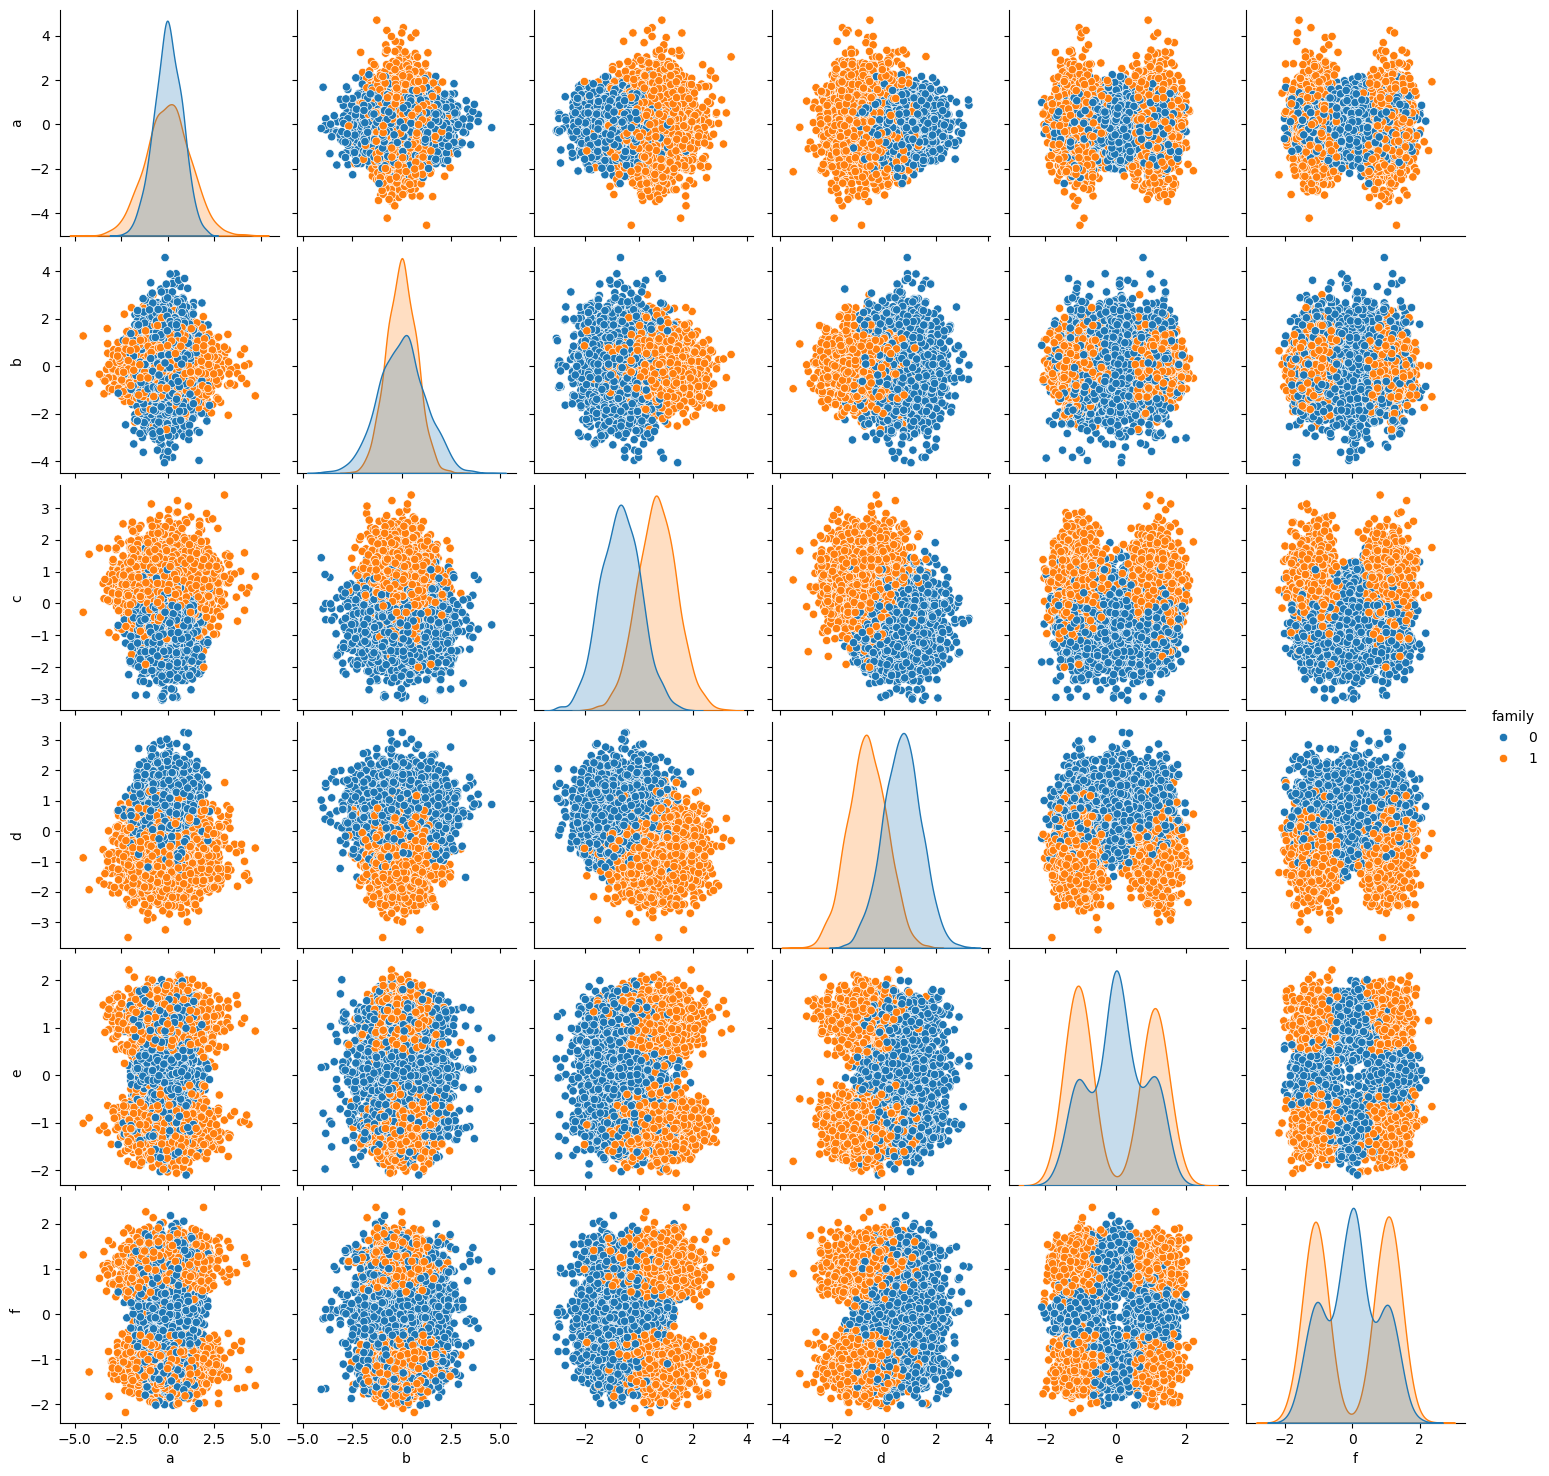

In [8]:

# add column family to localdf
sns.pairplot(df, hue="family", diag_kind="auto")
plt.show()

In [9]:
for i in range(3):

    localdf = df[df["family"]==i].drop(columns=["family"])
    print(f"Family: {i}")
    print((localdf.T @ localdf)/len(df))
    print("")
    var = localdf.var()
    print("Variance")
    print(var)
    print()

    std = localdf.std()
    print("Standard deviation")
    print(std)
    print("")


Family: 0
          a         b         c         d         e         f
a  0.283842  0.002218  0.003808  0.007590  0.007130 -0.000712
b  0.002218  0.708158 -0.006966 -0.001544 -0.001044 -0.002863
c  0.003808 -0.006966  0.501349 -0.218815 -0.017508  0.010559
d  0.007590 -0.001544 -0.218815  0.490657  0.015192  0.002977
e  0.007130 -0.001044 -0.017508  0.015192  0.339512  0.005720
f -0.000712 -0.002863  0.010559  0.002977  0.005720  0.351455

Variance
a    0.569772
b    1.421341
c    0.550161
d    0.536222
e    0.680301
f    0.705274
dtype: float64

Standard deviation
a    0.754832
b    1.192200
c    0.741728
d    0.732272
e    0.824804
f    0.839806
dtype: float64

Family: 1
          a         b         c         d         e         f
a  0.717501  0.002950 -0.002040  0.006936  0.002876 -0.012247
b  0.002950  0.290195 -0.008869  0.001103 -0.002969  0.002045
c -0.002040 -0.008869  0.501133 -0.218245 -0.009352 -0.004215
d  0.006936  0.001103 -0.218245  0.499637  0.010144  0.005293
e  0.00